In [1]:
# Importing the libraries 
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

Loading dataset

In [2]:
# Importing the dataset
spam_df = pd.read_csv('sms-spam.csv')

In [3]:
# Checking the first four rows of the dataset
spam_df.head(4)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN


In [4]:
# checking basic information about the dataset
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
# Checking the shape of the dataset
spam_df.shape

(5572, 5)

In [6]:
# Checking the number of missing values in the dataset
spam_df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [7]:
#Dropping the columns that are not needed
spam_df = spam_df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

In [8]:
# Checking the first four rows of the dataset
spam_df.head(4)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...


In [9]:
# renaming the columns
spam_df = spam_df.rename(columns = {'v1': 'label', 'v2': 'message'})
spam_df.head(4)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...


EDA(Exploratory Data Analysis)

In [10]:
# Print the column names to verify the existence of 'label' column
print(spam_df.columns)

# Checking the number of ham messages
spam_df["label"].value_counts()["ham"]

Index(['label', 'message'], dtype='object')


np.int64(4825)

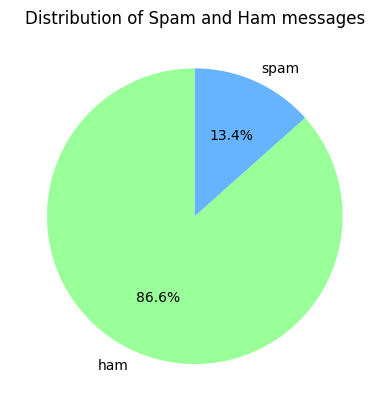

In [50]:
# Plotting the pie chart
plt.pie(spam_df["label"].value_counts(), labels=["ham", "spam"], autopct="%1.1f%%", startangle=90, colors=["#99ff99", "#66b3ff"])
plt.title('Distribution of Spam and Ham messages')
plt.show()

13.4% is Spam and 86.6% is not Spam(Ham)

In [11]:
# Checking the number of spam messages
spam_df["label"].value_counts()["spam"]

np.int64(747)

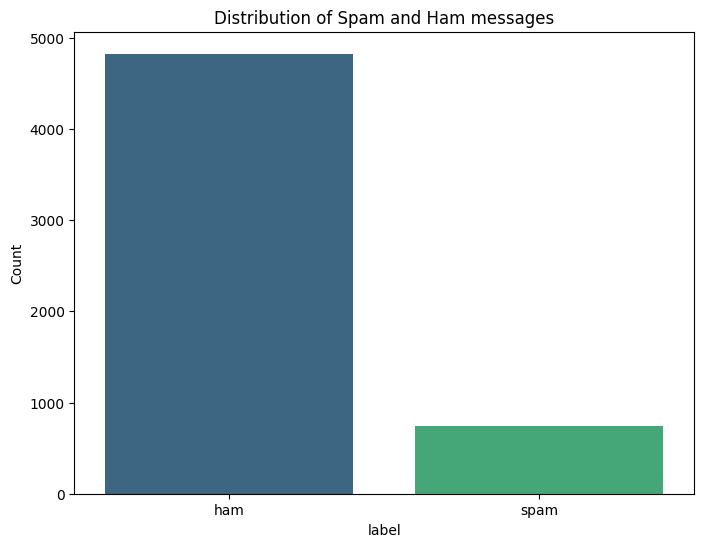

In [12]:
# Graphical representation of the number of spam and ham messages

plt.figure(figsize=(8, 6))
sns.countplot(x="label", hue='label', data=spam_df, palette='viridis')
plt.title('Distribution of Spam and Ham messages')
plt.xlabel('label')
plt.ylabel('Count')
plt.show()

In [13]:
# Checking the length of each message
spam_df['message_length'] = spam_df['message'].apply(len)
spam_df.head(4)

,label,message,message_length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49


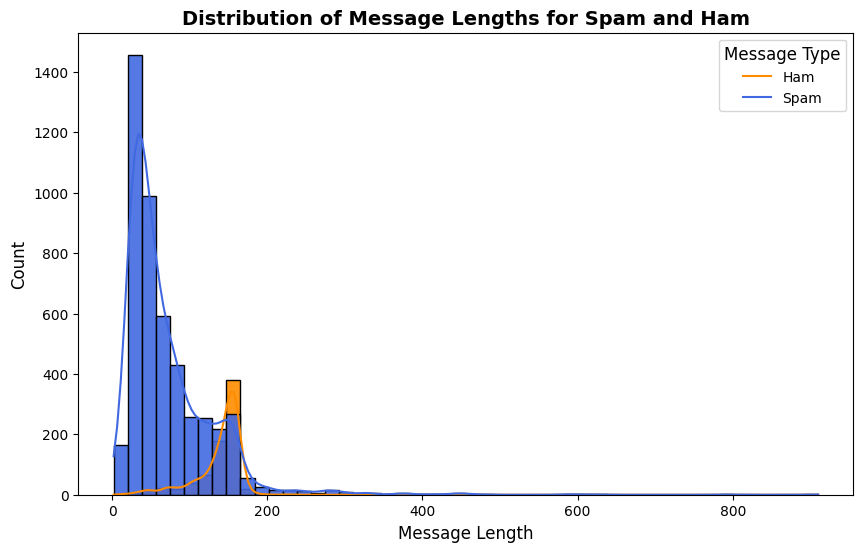

In [14]:
# Plotting the distribution of the length of the messages
plt.figure(figsize=(10, 6))
sns.histplot(
    data=spam_df,
    x='message_length',
    hue='label',  # Different colors for spam and ham
    bins=50,
    kde=True,  # Add kernel density estimate
    palette={'spam': 'darkorange', 'ham': 'royalblue'},  # Broader, distinct colors
    alpha=0.9  # Adjust transparency for overlap
)
plt.title('Distribution of Message Lengths for Spam and Ham', fontsize=14, fontweight='bold')
plt.xlabel('Message Length', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Message Type', labels=['Ham', 'Spam'], fontsize=10, title_fontsize=12)
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_2552\2364899816.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='message_length', data=spam_df, palette='viridis')


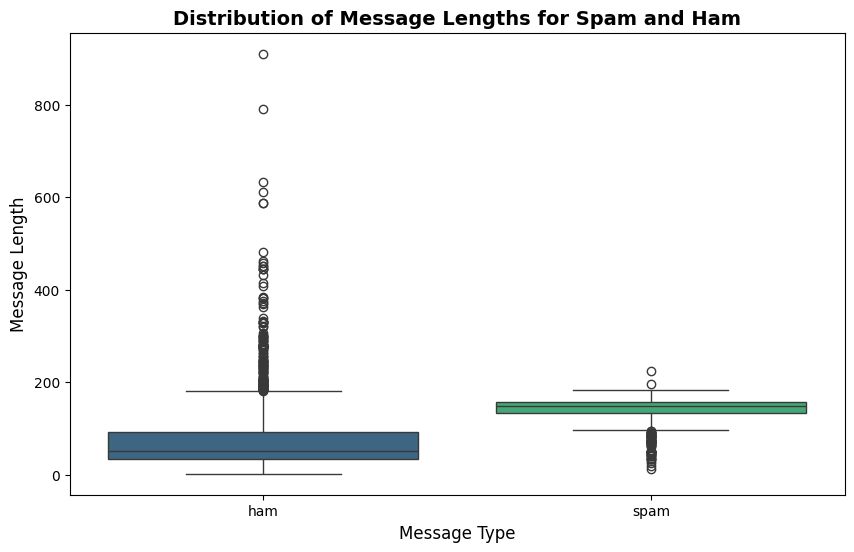

In [15]:
# Plotting the distribution of the length of the messages
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='message_length', data=spam_df, palette='viridis')
plt.title('Distribution of Message Lengths for Spam and Ham', fontsize=14, fontweight='bold')
plt.xlabel('Message Type', fontsize=12)
plt.ylabel('Message Length', fontsize=12)
plt.show()

Text Preprocessing

In [16]:
# Importing regular expression library
import re

# Function to remove special characters
def remove_html_tags(text):
    clean_text = re.sub(r'<.*?>', '', text)
    return clean_text
spam_df['message'] = spam_df['message'].apply(remove_html_tags)

In [17]:
# Checking the first four rows of the dataset
spam_df.head(4)

,label,message,message_length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49


In [18]:
# importing the nltk library
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
# Ensure the 'message' column contains strings
spam_df['message'] = spam_df['message'].astype(str)

# Adding a new column for the length of the messages
spam_df['message_length'] = spam_df['message'].apply(len)

# Define the tokenize_text function
def tokenize_text(text):
    tokens = word_tokenize(text)
    return tokens

# Apply the tokenize_text function to the 'message' column and create a new column for tokenized messages
spam_df['message'] = spam_df['message'].apply(tokenize_text)


In [20]:
# Checking the first four rows of the dataset
spam_df.head(4)

,label,message,message_length
0,ham,"[Go, until, jurong, point, ,, crazy, .., Avail...",111
1,ham,"[Ok, lar, ..., Joking, wif, u, oni, ...]",29
2,spam,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",155
3,ham,"[U, dun, say, so, early, hor, ..., U, c, alrea...",49


In [21]:
# Checking the first tokenized message
spam_df['message'][0]

['Go',
 'until',
 'jurong',
 'point',
 ',',
 'crazy',
 '..',
 'Available',
 'only',
 'in',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 '...',
 'Cine',
 'there',
 'got',
 'amore',
 'wat',
 '...']

In [22]:
# checking the type of the tokenized message
print(type(spam_df['message'][0]))

<class 'list'>


In [23]:
# Function to remove special character tokens
def remove_special_character_tokens(tokens):
    return [token for token in tokens if token.isalnum()]

# Apply the function to the 'message_tokens' column
spam_df['message'] = spam_df['message'].apply(remove_special_character_tokens)

# Display the first four rows of the dataset to verify the changes
spam_df.head(4)

,label,message,message_length
0,ham,"[Go, until, jurong, point, crazy, Available, o...",111
1,ham,"[Ok, lar, Joking, wif, u, oni]",29
2,spam,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",155
3,ham,"[U, dun, say, so, early, hor, U, c, already, t...",49


In [24]:
# stopwords 
stop_words = set(stopwords.words('english'))

In [25]:
# Let's print stopwords
print(stop_words)

{'him', 'don', 'itself', 'of', 'o', 'having', 'weren', 'which', 'd', 'ours', 'this', 'hasn', 'other', 'under', 'below', 'being', 'is', "mustn't", 'wouldn', 'his', "didn't", "you'd", 'during', 'own', 'most', 'had', 'between', 'be', 'such', "couldn't", 'shan', 'the', 'doesn', 'myself', 'at', "hadn't", 'do', 'isn', 'above', 'our', 'few', 'me', "shan't", "should've", 'haven', 'for', 'some', 'about', 'who', 'too', "doesn't", 'your', 'those', 'does', 'i', 'her', 'while', 'all', 'himself', 'they', 'them', 'than', 'we', 'by', 'y', 'no', 'should', 're', "won't", 'against', 'here', 'or', "weren't", 'has', 'once', 'mightn', 'whom', 'it', 'yours', 'not', 'needn', 'on', 'am', "wasn't", "that'll", "shouldn't", 'from', 'are', 'until', "hasn't", 'before', 'aren', 'to', 'have', 'because', 'same', 'after', "you're", "wouldn't", 'been', 'but', 'won', 'she', 'were', 'shouldn', 'if', 'herself', 'ain', 'any', 'with', 'more', "needn't", 'yourselves', 'that', 't', 'was', 'can', 'just', 'off', "haven't", "it's

In [26]:
# Print stopwords in vertical manner
for word in stop_words:
    print(word)

him
don
itself
of
o
having
weren
which
d
ours
this
hasn
other
under
below
being
is
mustn't
wouldn
his
didn't
you'd
during
own
most
had
between
be
such
couldn't
shan
the
doesn
myself
at
hadn't
do
isn
above
our
few
me
shan't
should've
haven
for
some
about
who
too
doesn't
your
those
does
i
her
while
all
himself
they
them
than
we
by
y
no
should
re
won't
against
here
or
weren't
has
once
mightn
whom
it
yours
not
needn
on
am
wasn't
that'll
shouldn't
from
are
until
hasn't
before
aren
to
have
because
same
after
you're
wouldn't
been
but
won
she
were
shouldn
if
herself
ain
any
with
more
needn't
yourselves
that
t
was
can
just
off
haven't
it's
into
both
an
s
will
why
a
now
he
you
then
m
so
over
don't
wasn
up
down
yourself
isn't
only
mustn
each
did
you'll
as
you've
how
where
hadn
what
there
further
in
through
doing
very
she's
theirs
when
hers
out
ve
nor
again
didn
couldn
their
mightn't
my
its
these
themselves
ll
and
ma
aren't
ourselves


In [27]:
# remove stopwords
def remove_stopwords(tokens, stop_words):
    # Normalize stop_words to lowercase for consistent case-insensitive comparison
    stop_words = set(word.lower() for word in stop_words)
    
    # Filter out stop words from the tokens
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    return filtered_tokens

# Apply the remove_stopwords function to the 'message' column
spam_df["message"] = spam_df["message"].apply(remove_stopwords, stop_words=stop_words)

In [28]:
# Display the first index of the dataset to verify the changes
stop_words = [word for word in spam_df["message"][0] if word in stop_words]
stop_words

[]


The PorterStemmer class from the NLTK library.

PorterStemmer is used for stemming, which is the process of reducing words to their base or root form.

This is useful in natural language processing (NLP) tasks such as text classification, where it helps in normalizing the text data.


In [29]:
st= PorterStemmer()

# Function to apply stemming to the tokens
def stem_words(tokens):
    stem_words = [st.stem(word) for word in tokens]
    return stem_words

# Apply the stem_words function to the 'message' column
spam_df['message'] = spam_df['message'].apply(stem_words)
    

In [30]:
# checking the first four rows of the dataset
spam_df.head(4)

,label,message,message_length
0,ham,"[go, jurong, point, crazi, avail, bugi, n, gre...",111
1,ham,"[ok, lar, joke, wif, u, oni]",29
2,spam,"[free, entri, 2, wkli, comp, win, fa, cup, fin...",155
3,ham,"[u, dun, say, earli, hor, u, c, alreadi, say]",49


In [31]:
# The 'message' column will now contain messages where each character is separated by a space and all characters are in lowercase
spam_df["message"] = spam_df["message"].apply(lambda x:' '.join(map(str,x)).lower())

# This will split the message into characters, join them with spaces, and convert the entire message to lowercase.


In [32]:
# Checking the first rows of the dataset
spam_df["message"]

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: message, Length: 5572, dtype: object

In [33]:
# Checking the first four rows of the dataset
spam_df.head(4)

,label,message,message_length
0,ham,go jurong point crazi avail bugi n great world...,111
1,ham,ok lar joke wif u oni,29
2,spam,free entri 2 wkli comp win fa cup final tkt 21...,155
3,ham,u dun say earli hor u c alreadi say,49


In [34]:
# checking the first message
spam_df['message'][0]

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

Model Buiding

In [35]:
# Importing the libraries for the model building process 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [36]:
# Assigning the columns to X and y
x = spam_df['message']
y = spam_df['label']

In [37]:
# Transforming the text data into numerical data
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(spam_df['message'])

In [38]:
# Splitting the dataset into training and testing set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [39]:
# Support vector classifier
from sklearn.svm import SVC
sv_model = SVC()
sv_model.fit(x_train, y_train)

SVC()

In [40]:
# Predicting the model
y_pred = sv_model.predict(x_test)

# Checking the accuracy of the model
print('Accuracy: {:.3f}'.format(accuracy_score(y_test, y_pred)))

print(classification_report(y_test, y_pred))

Accuracy: 0.978
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       967
        spam       1.00      0.84      0.91       148

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [41]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier( n_estimators=100, random_state=30)
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=30)

In [42]:
# Predicting the model
y_pred1= rf_model.predict(x_test)

# Checking the accuracy of the model
print('Accuracy: {:.3f}'.format(accuracy_score(y_test, y_pred1)))
print(classification_report(y_test, y_pred1))

Accuracy: 0.979
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       967
        spam       1.00      0.84      0.92       148

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [43]:
# Logistic Regression Classifier 
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)

LogisticRegression()

In [44]:
# Predicting the model
y_pred3= lr_model.predict(x_test)

# Checking the accuracy of the model
print('Accuracy: {:.3f}'.format(accuracy_score(y_test, y_pred3)))
print(classification_report(y_test, y_pred3))

Accuracy: 0.959
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       967
        spam       0.99      0.70      0.82       148

    accuracy                           0.96      1115
   macro avg       0.97      0.85      0.90      1115
weighted avg       0.96      0.96      0.96      1115



In [45]:
# importing pickle library for saving the model  
import pickle
with open('rf_model.pkl', 'wb') as model_file:
    pickle.dump(rf_model, model_file)
    
